<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/Milestone_project_Food_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py


--2025-10-04 10:52:04--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-10-04 10:52:04 (99.7 MB/s) - ‘helper_functions.py’ saved [6733/6733]



In [3]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,compare_historys

In [4]:
# Use Tensorflow datasets to download dataser
import tensorflow_datasets as tfds
dataset_list=tfds.list_builders()
print(dataset_list)

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'ai2dcaption', 'aloha_mobile', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asimov_dilemmas_auto_val', 'asimov_dilemmas_scifi_train', 'asimov_dilemmas_scifi_val', 'asimov_injury_val', 'asimov_multimodal_auto_val', 'asimov_multimodal_manual_val', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'b

In [5]:
print('food101' in dataset_list)

True


In [6]:
# Load dataset
(train_data,test_data),ds_info=tfds.load(name='food101',
                                         shuffle_files=True,as_supervised=True,with_info=True,split=['train','validation'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.I8UVS9_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.I8UVS9_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [7]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [11]:
class_names=ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [12]:
# Take one sample from the train data
train_one_sample=train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [15]:
for image, label in train_one_sample:
  print(f"""
  Image shape :{image.shape},
  Image Datatype :{image.dtype},
  Target class from Food101 tensor form :{label},
  Class name (str form ):{class_names[label.numpy()]}
  """)


  Image shape :(512, 512, 3),
  Image Datatype :<dtype: 'uint8'>,
  Target class from Food101 tensor form :31,
  Class name (str form ):donuts
  


In [ ]:
image

In [16]:
import tensorflow as tf
tf.reduce_min(image),tf.reduce_max(image)


(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

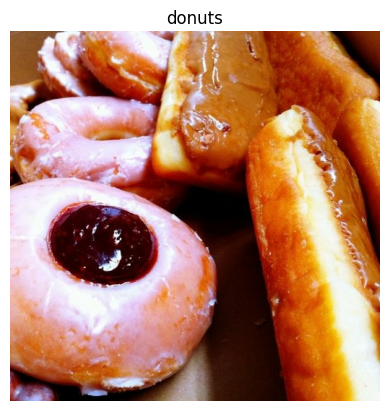

In [17]:
# Plot image
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [18]:
# Create a preprocessing functions
def preprocess_img(image,label,img_shape=224):
    image=tf.image.resize(image,[img_shape,img_shape])
    return tf.cast(image,tf.float32),label

In [20]:
preprocessed_img=preprocess_img(image,label)[0]
print(f'Image before preprocessing \n {image[:2]}......\n Shape:{image.shape} \n  Datatype:{image.dtype}')
print(f'Image AFTER preprocessing \n {preprocessed_img[:2]}......\n Shape:{preprocessed_img.shape} \n  Datatype:{preprocessed_img.dtype}')

Image before preprocessing 
 [[[131  86  55]
  [134  89  58]
  [137  92  61]
  ...
  [131  44   0]
  [135  49   2]
  [138  52   5]]

 [[134  89  58]
  [135  90  59]
  [135  90  59]
  ...
  [133  46   1]
  [134  48   1]
  [134  48   1]]]......
 Shape:(512, 512, 3) 
  Datatype:<dtype: 'uint8'>
Image AFTER preprocessing 
 [[[1.34030609e+02 8.90306168e+01 5.80306129e+01]
  [1.36045914e+02 9.10459213e+01 6.00459175e+01]
  [1.37846939e+02 9.28469391e+01 6.38469391e+01]
  ...
  [1.30265366e+02 4.79183846e+01 1.62753057e+00]
  [1.30760223e+02 4.37602272e+01 4.59267795e-02]
  [1.34739838e+02 4.87398338e+01 1.73983324e+00]]

 [[1.41551025e+02 9.65510254e+01 6.55510254e+01]
  [1.49081650e+02 1.04081635e+02 7.30816345e+01]
  [1.51632660e+02 1.06632652e+02 7.56326523e+01]
  ...
  [1.30357101e+02 4.85713654e+01 1.99989128e+00]
  [1.34147995e+02 5.01479988e+01 4.14799976e+00]
  [1.33571289e+02 4.95712891e+01 3.57128906e+00]]]......
 Shape:(224, 224, 3) 
  Datatype:<dtype: 'float32'>


In [21]:
# bAtch and prepare dataset
train_data=train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)

In [22]:
# Shuffle train data and turn it into batches and prefetch it
train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
test_data=test_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [24]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [26]:
# Create a Model Checkpoint
check_point_path='model_checkpoints/cp.weights.h5'
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=check_point_path,monitor='val_acc',save_best_only=True,save_weights_only=True,verbose=0)

In [28]:
#Setup mixed precission
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [29]:
from tensorflow.keras import layers

In [32]:
# Creating a Feature extraction model capable of mixed precision

# Create a base model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
input_shape=(224,224,3)

# Create a  functional model
inputs=layers.Input(shape=input_shape,name='input_layer')
# x=layers.Rescaling(1/255.)(inputs) # Rescaling is done in the preprocess_img function
x=base_model(inputs, training=False)
x=layers.GlobalAvgPool2D()(x)
x=layers.Dense(len(class_names))(x)
outputs=layers.Activation('softmax',dtype=tf.float32,name='softmax_float32')(x)
model=tf.keras.Model(inputs,outputs)

In [40]:
#compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_float32 (Activation)    │ (None, 101)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [36]:
# checking layer dtype policies
for layer in model.layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_layer True float32 <DTypePolicy "mixed_float16">
efficientnetb0 False float32 <DTypePolicy "mixed_float16">
global_average_pooling2d True float32 <DTypePolicy "mixed_float16">
dense True float32 <DTypePolicy "mixed_float16">
softmax_float32 True float32 <DTypePolicy "float32">


In [37]:
for layer in model.layers[1].layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_layer_2 False float32 <DTypePolicy "mixed_float16">
rescaling_4 False float32 <DTypePolicy "mixed_float16">
normalization_2 False float32 <DTypePolicy "mixed_float16">
rescaling_5 False float32 <DTypePolicy "mixed_float16">
stem_conv_pad False float32 <DTypePolicy "mixed_float16">
stem_conv False float32 <DTypePolicy "mixed_float16">
stem_bn False float32 <DTypePolicy "mixed_float16">
stem_activation False float32 <DTypePolicy "mixed_float16">
block1a_dwconv False float32 <DTypePolicy "mixed_float16">
block1a_bn False float32 <DTypePolicy "mixed_float16">
block1a_activation False float32 <DTypePolicy "mixed_float16">
block1a_se_squeeze False float32 <DTypePolicy "mixed_float16">
block1a_se_reshape False float32 <DTypePolicy "mixed_float16">
block1a_se_reduce False float32 <DTypePolicy "mixed_float16">
block1a_se_expand False float32 <DTypePolicy "mixed_float16">
block1a_se_excite False float32 <DTypePolicy "mixed_float16">
block1a_project_conv False float32 <DTypePolicy "mixed_fl

In [41]:
from os.path import dirname
history_101_food_classes_feature_extarction=model.fit(train_data,epochs=3,steps_per_epoch=(len(train_data)),validation_data=test_data,validation_steps=int(0.15*len(test_data)),callbacks=[create_tensorboard_callback(dir_name="training_logs",experiment_name='efficient_net_B0'),model_checkpoint])

Saving TensorBoard log files to: training_logs/efficient_net_B0/20251004-114535
Epoch 1/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4774 - loss: 2.2844

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 252s 83ms/step - accuracy: 0.4774 - loss: 2.2842 - val_accuracy: 0.6978 - val_loss: 1.1309
Epoch 2/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 152s 63ms/step - accuracy: 0.6665 - loss: 1.2950 - val_accuracy: 0.7180 - val_loss: 1.0338
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 217s 70ms/step - accuracy: 0.7014 - loss: 1.1390 - val_accuracy: 0.7320 - val_loss: 0.9854


In [42]:
# Evaluate Model
results_feature_extract_model=model.evaluate(test_data)
results_feature_extract_model

790/790 ━━━━━━━━━━━━━━━━━━━━ 64s 80ms/step - accuracy: 0.7274 - loss: 0.9988


[0.9957172870635986, 0.7305742502212524]

In [43]:
# lets now fine tune the model
base_model.trainable=True
for layer in model.layers[1].layers[:-10]:
    layer.trainable=False


In [44]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [45]:
history_fine_tune=model.fit(train_data,epochs=10,steps_per_epoch=(len(train_data)),validation_data=test_data,validation_steps=int(0.15*len(test_data)),callbacks=[create_tensorboard_callback(dir_name="training_logs",experiment_name='efficient_net_B0_fine_tuned'),model_checkpoint])

Saving TensorBoard log files to: training_logs/efficient_net_B0_fine_tuned/20251004-120226
Epoch 1/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6626 - loss: 1.2707

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 229s 80ms/step - accuracy: 0.6626 - loss: 1.2707 - val_accuracy: 0.7497 - val_loss: 0.9074
Epoch 2/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 153s 64ms/step - accuracy: 0.7489 - loss: 0.9244 - val_accuracy: 0.7614 - val_loss: 0.8728
Epoch 3/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 156s 65ms/step - accuracy: 0.7890 - loss: 0.7528 - val_accuracy: 0.7566 - val_loss: 0.8797
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 154s 64ms/step - accuracy: 0.8282 - loss: 0.6082 - val_accuracy: 0.7651 - val_loss: 0.8814
Epoch 5/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 151s 63ms/step - accuracy: 0.8547 - loss: 0.5090 - val_accuracy: 0.7667 - val_loss: 0.8759
Epoch 6/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 155s 65ms/step - accuracy: 0.8796 - loss: 0.4195 - val_accuracy: 0.7532 - val_loss: 0.9523
Epoch 7/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 157s 66ms/step - accuracy: 0.8973 - loss: 0.3546 - val_accuracy: 0.7598 - val_loss: 0.9436
Epoch 8/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 159s 66ms/step - accuracy: 0.9163 - lo

In [46]:
res_final_fine_tuned=model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.7560 - loss: 1.0388


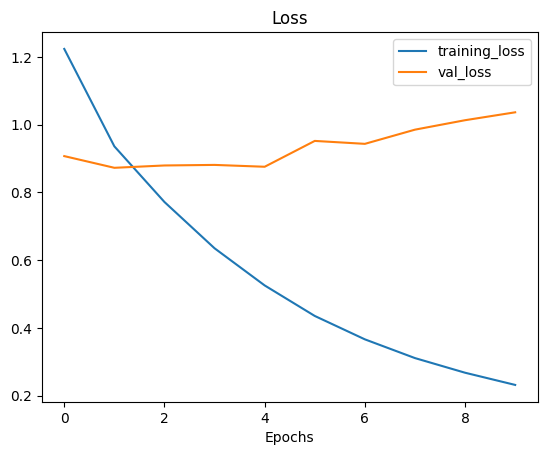

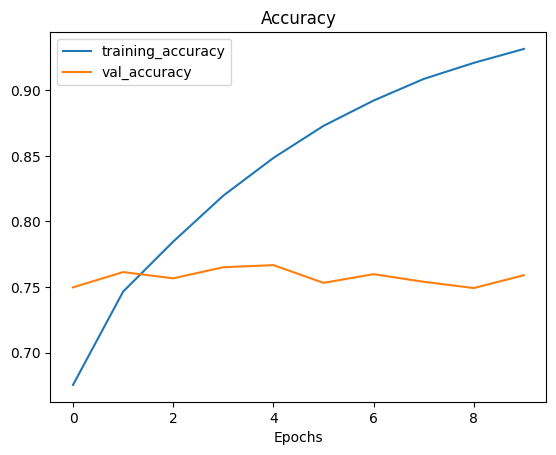

In [50]:
plot_loss_curves(history=history_fine_tune)

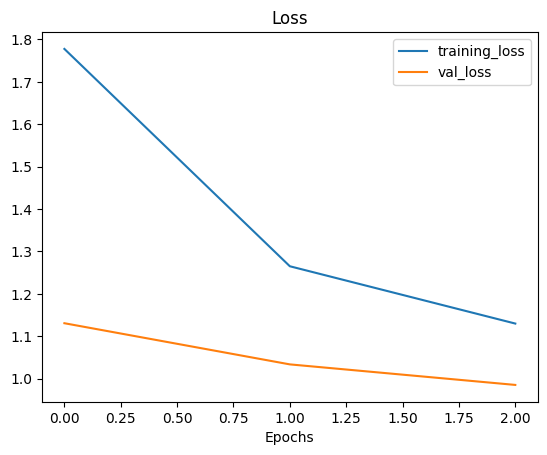

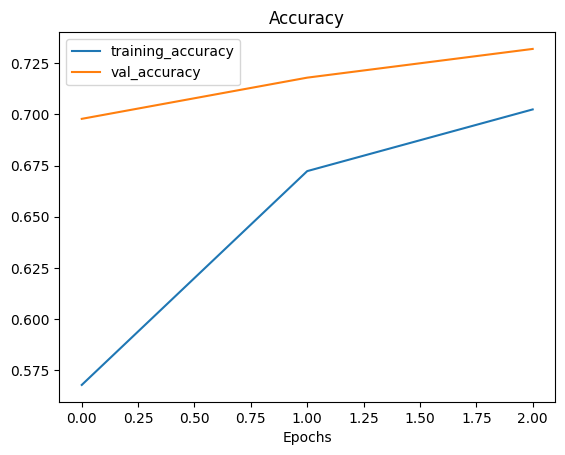

In [51]:
plot_loss_curves(history_101_food_classes_feature_extarction)

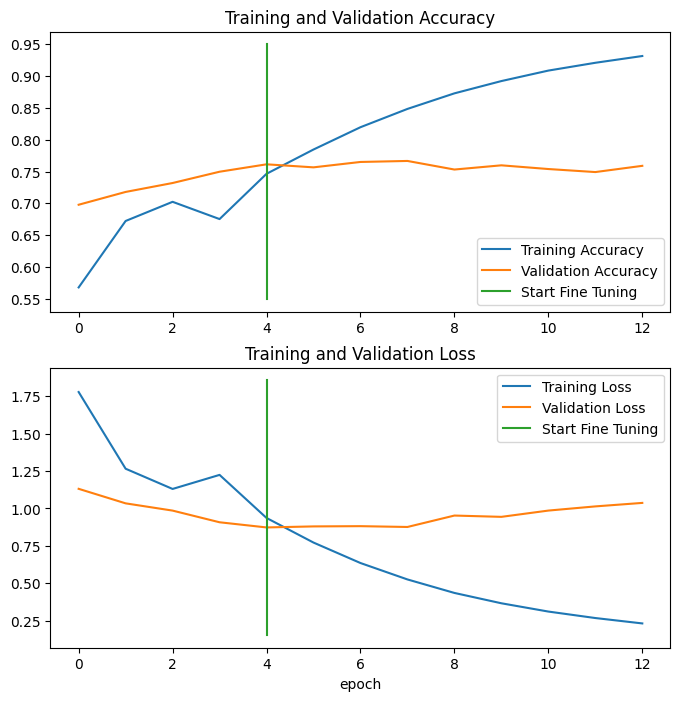

In [52]:
compare_historys(original_history=history_101_food_classes_feature_extarction,new_history=history_fine_tune)

In [53]:
# lets now fine tune the model
base_model.trainable=True
for layer in model.layers[1].layers[:-10]:
    layer.trainable=False

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [56]:
total_epochs=10
history_fine_tuned_second=model.fit(train_data,epochs=total_epochs,
                            initial_epoch=history_101_food_classes_feature_extarction.epoch[-1],
                            steps_per_epoch=(len(train_data)),
                            validation_data=test_data,
                            validation_steps=int(0.15*len(test_data)),
                            callbacks=[create_tensorboard_callback(dir_name="training_logs",
                            experiment_name='efficient_net_B0_fine_tuned'),
                                                                                                                                                                  model_checkpoint])

Saving TensorBoard log files to: training_logs/efficient_net_B0_fine_tuned/20251004-131937
Epoch 3/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9404 - loss: 0.2030

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 228s 81ms/step - accuracy: 0.9404 - loss: 0.2030 - val_accuracy: 0.7484 - val_loss: 1.0509
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 157s 65ms/step - accuracy: 0.9488 - loss: 0.1747 - val_accuracy: 0.7540 - val_loss: 1.0808
Epoch 5/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 210s 69ms/step - accuracy: 0.9556 - loss: 0.1527 - val_accuracy: 0.7558 - val_loss: 1.1109
Epoch 6/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 157s 66ms/step - accuracy: 0.9562 - loss: 0.1465 - val_accuracy: 0.7489 - val_loss: 1.1246
Epoch 7/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 157s 65ms/step - accuracy: 0.9607 - loss: 0.1329 - val_accuracy: 0.7534 - val_loss: 1.1516
Epoch 8/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 155s 65ms/step - accuracy: 0.9639 - loss: 0.1230 - val_accuracy: 0.7492 - val_loss: 1.1739
Epoch 9/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 156s 65ms/step - accuracy: 0.9663 - loss: 0.1169 - val_accuracy: 0.7542 - val_loss: 1.1734
Epoch 10/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 156s 65ms/step - accuracy: 0.9671 - l

Lets Now try to beat the original deep food paper which as accuracy of 76%

In [58]:
# === Build Fine-Tuned EfficientNetB0 Model ===
base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet", input_shape=(224,224,3))

# Unfreeze last 50 layers (adjust if needed)
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)

outputs = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)

model = tf.keras.Model(inputs=base_model.input, outputs=outputs)

# Compile
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)

# Train
total_epochs = 10
history_fine_tuned = model.fit(
    train_data,
    epochs=total_epochs,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data)),
    callbacks=[
        create_tensorboard_callback(dir_name="training_logs", experiment_name="efficientnet_b0_finetuned_v2"),
        model_checkpoint
    ]
)

Saving TensorBoard log files to: training_logs/efficientnet_b0_finetuned_v2/20251004-134414
Epoch 1/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.2048 - loss: 3.8741

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 288s 93ms/step - accuracy: 0.2048 - loss: 3.8737 - val_accuracy: 0.6888 - val_loss: 1.1851
Epoch 2/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 161s 67ms/step - accuracy: 0.5436 - loss: 1.8139 - val_accuracy: 0.7500 - val_loss: 0.9151
Epoch 3/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 162s 68ms/step - accuracy: 0.6283 - loss: 1.4385 - val_accuracy: 0.7733 - val_loss: 0.8227
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 201s 84ms/step - accuracy: 0.6833 - loss: 1.2027 - val_accuracy: 0.7884 - val_loss: 0.7647
Epoch 5/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 160s 67ms/step - accuracy: 0.7192 - loss: 1.0473 - val_accuracy: 0.7995 - val_loss: 0.7347
Epoch 6/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 160s 67ms/step - accuracy: 0.7580 - loss: 0.8927 - val_accuracy: 0.8093 - val_loss: 0.7173
Epoch 7/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 162s 67ms/step - accuracy: 0.7851 - loss: 0.7844 - val_accuracy: 0.8109 - val_loss: 0.7037
Epoch 8/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 202s 68ms/step - accuracy: 0.8091 - lo

In [59]:
res_v2_fine_tuned=model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 65s 81ms/step - accuracy: 0.8050 - loss: 0.7385


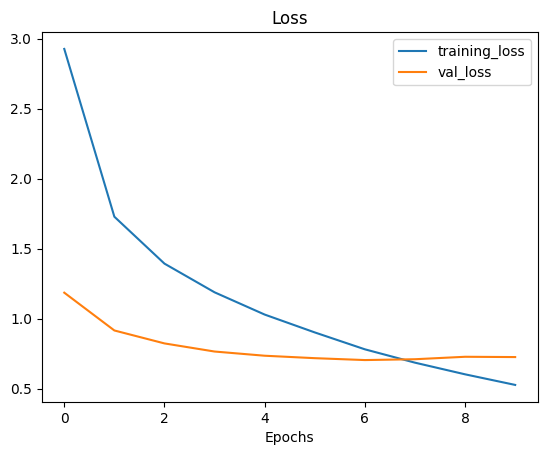

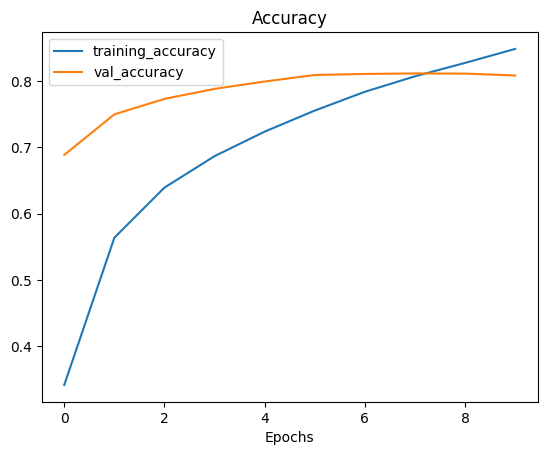

In [60]:
plot_loss_curves(history_fine_tuned)